# Analisando faturamento

Esse notebook consiste em uma análise exploratória dos dados da aplicação DelPhone, utilizando pandas e outras ferramentas de visualização.

Foram utilizadas as bases 'delphone_empresa' e 'delphone_busca', criadas no projeto Django através de modelos. A inserção de dados foi feita utilizando a biblioteca Faker do python e uma tabela com as cidades e estados brasileiros.

## Bibliotecas necessárias

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sqlite3

## Conectando ao banco de dado com os dados das empresas e passando para Pandas

In [2]:
conn = sqlite3.connect('../db.sqlite3')
cur = conn.cursor()

query = '''
SELECT * 
FROM delphone_empresa
'''

empresa = pd.read_sql(query, con = conn)

empresa = empresa.drop(columns = 'id') 

empresa.head()

,nome,email,celular,endereco,estado,cidade,setor,n_funcionario,n_filiais,data_criacao,faturamento_anual,horario_abertura,horario_fechamento
0,Vega-Davis,moniquepatterson@example.net,619-235-8267x594,"39072 Dominguez Brooks\nNew Sean, AL 24938",RS,Vila Maria,Papelaria,945.0,57.0,1983-08-15,261.0,14:22:00,07:55:39
1,"Molina, Turner and Evans",rcarpenter@example.net,793-057-3456x927,"386 James Neck\nJasminefort, WV 94271",BA,Riachão Das Neves,Esportes,380.0,86.0,2021-02-01,535.0,04:08:05,07:35:00
2,Cameron-Mcdonald,charlesanderson@example.com,001-182-115-3409,"8674 Jose Lock Apt. 550\nLake Malikview, LA 39125",MG,Itanhomi,Vestuário,540.0,34.0,2005-07-11,573.0,10:35:44,19:29:34
3,Mcdonald-Hudson,msanders@example.com,+1-924-043-5432x16295,"385 Brett Valleys\nNorth Mary, NE 72357",CE,Ipueiras,Cozinha,283.0,26.0,1997-08-31,955.0,09:02:09,01:30:08
4,Myers-Diaz,carrolldeborah@example.com,(779)083-8986,"65693 Lee Court Apt. 876\nNew Victorialand, KY...",PB,Santa Cecília,Esportes,322.0,3.0,1978-05-19,459.0,04:40:42,15:31:53


In [64]:
conn = sqlite3.connect('../db.sqlite3')
cur = conn.cursor()

query = '''
SELECT * 
FROM delphone_busca
'''

busca = pd.read_sql(query, con = conn)

busca = busca.drop(columns = 'id') 

busca.head()

,estado,cidade,setor
0,AP,Amapá,Alimentação
1,RS,Palmitinho,Papelaria
2,PI,Agricolândia,Esportes
3,SP,Buri,Eletrodomésticos
4,PE,Capoeiras,Esportes


## Análise Exploratória

Agora, com as bibliotecas importadas e as tabelas criadas, vou analisar o faturamento anual das empresas, respondendo as seguintes perguntas, comparando cada uma por setor e também por estado.
* [Quais as empresas com maior e menor faturamento?](#maxmin)
* [Qual o faturamento médio?](#media)

## Maior e menor faturamento por setor <a class="anchor" id="maxmin"></a>

In [57]:
a1 = empresa.groupby('setor').sum()
a1 = a1[['faturamento_anual']]
a1 = a1.sort_values('faturamento_anual')
#somando o faturamento total por setor e ordenando
a1

,faturamento_anual
setor,
Alimentação,44232.0
Papelaria,45030.0
Material de construção,47471.0
Música,48697.0
Esportes,48778.0
Eletrodomésticos,50435.0
Mobília,50487.0
Cozinha,52363.0
Farmácia,52401.0


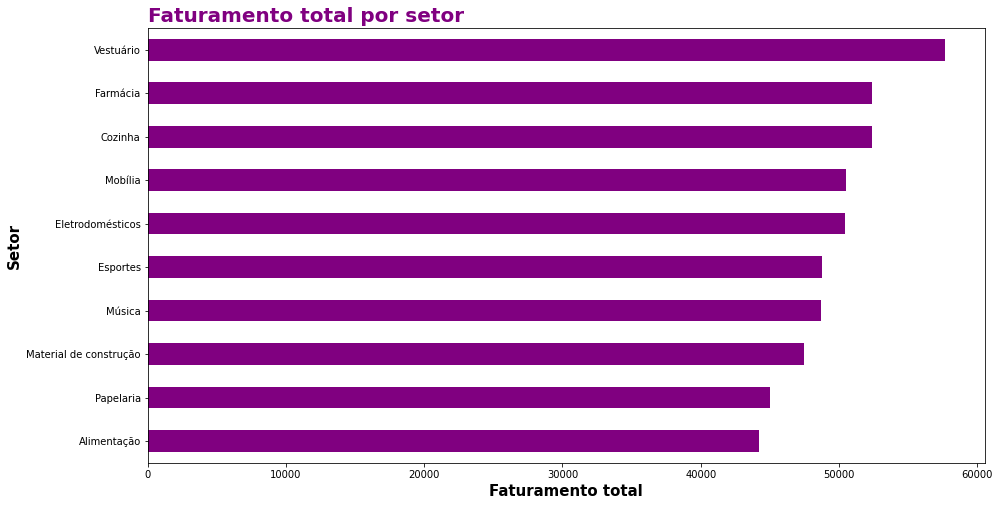

In [60]:
a1.plot(kind='barh',figsize=(15,8),color='purple')
plt.xlabel('Faturamento total',          
           fontdict={'color' : 'black', 'weight': 'bold', 'size': 15})

plt.ylabel('Setor',          
           fontdict={'color' : 'black', 'weight': 'bold', 'size': 15})

plt.title('Faturamento total por setor', 
          fontdict={'color' : 'purple', 'weight': 'bold', 'size': 20}, loc='left')

plt.legend().remove()

Assim, é possível perceber que Vestuário possui o maior faturamento (R$57657.0), enquanto Alimentação é o setor que menos fatura (R$44232.0).

## Maior e menor faturamento por estado 

In [52]:
a2 = empresa.groupby('estado').sum()
a2 = a2[['faturamento_anual']]
a2 = a2.sort_values('faturamento_anual')
a2
#somando o faturamento total por estado e ordenando

,faturamento_anual
estado,
AP,256.0
DF,367.0
AC,2131.0
RR,2177.0
AM,4396.0
RO,5021.0
MS,5551.0
TO,6717.0
SE,6773.0


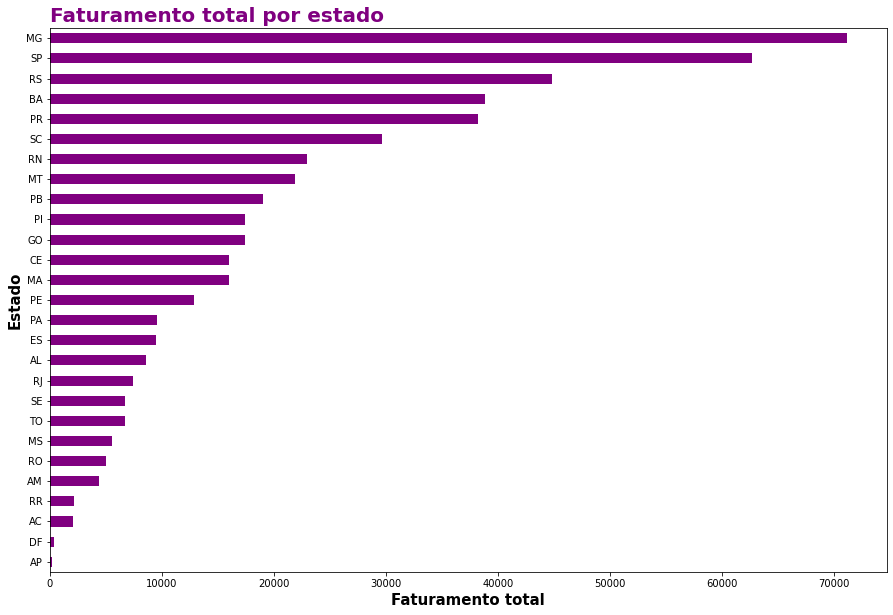

In [59]:
a2.plot(kind='barh',figsize=(15,10),color='purple')
plt.xlabel('Faturamento total',          
           fontdict={'color' : 'black', 'weight': 'bold', 'size': 15})

plt.ylabel('Estado',          
           fontdict={'color' : 'black', 'weight': 'bold', 'size': 15})

plt.title('Faturamento total por estado', 
          fontdict={'color' : 'purple', 'weight': 'bold', 'size': 20}, loc='left')

plt.legend().remove()

Pela tabela e pelo gráfico vemos que Minas Gerais é o estado em 1º lugar, com um faturamento médio de R$71115.0, enquanto o Amapá é o estado com menor faturamento, totalizando apenas R$256.0

## Faturamento médio por setor <a class="anchor" id="media"></a>

In [55]:
a3 = empresa.groupby('setor').mean()
a3 = a3[['faturamento_anual']]
a3 = a3.sort_values('faturamento_anual')
#somando o faturamento médio por setor e ordenando
a3

,faturamento_anual
setor,
Esportes,431.663717
Papelaria,474.000000
Mobília,480.828571
Farmácia,485.194444
Música,496.908163
Alimentação,502.636364
Material de construção,515.989130
Eletrodomésticos,519.948454
Cozinha,523.630000


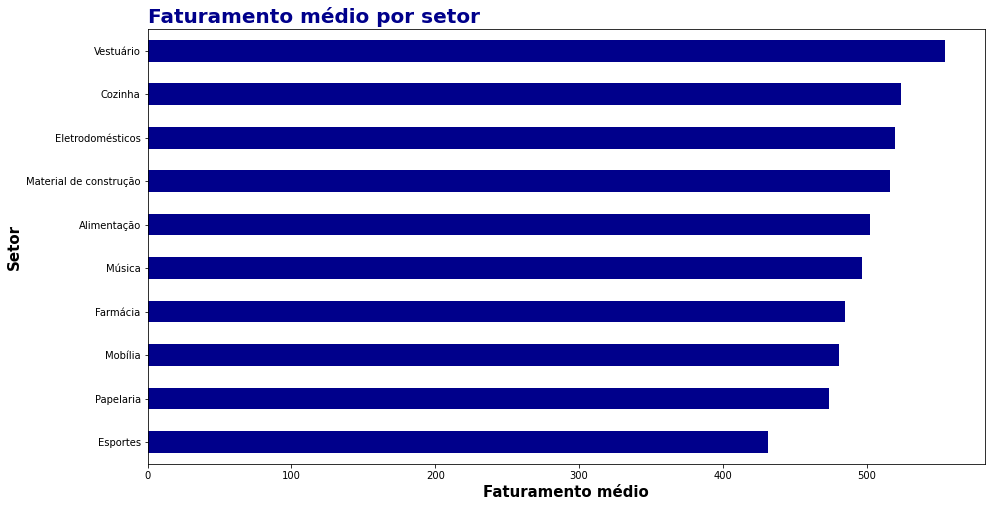

In [61]:
a3.plot(kind='barh',figsize=(15,8),color='darkblue')
plt.xlabel('Faturamento médio',          
           fontdict={'color' : 'black', 'weight': 'bold', 'size': 15})

plt.ylabel('Setor',          
           fontdict={'color' : 'black', 'weight': 'bold', 'size': 15})

plt.title('Faturamento médio por setor', 
          fontdict={'color' : 'darkblue', 'weight': 'bold', 'size': 20}, loc='left')

plt.legend().remove()

Vestuário continua em primeiro lugar, sendo o setor com maior faturamento médio (R$554.39), mas o último lugar agora é ocupado pelo setor de esportes, com menor faturamento médio (R$431.66).

## Faturamento médio por estado 

In [56]:
a4 = empresa.groupby('estado').mean()
a4 = a4[['faturamento_anual']]
a4 = a4.sort_values('faturamento_anual')
#somando o faturamento médio por estado e ordenando
a4

,faturamento_anual
estado,
AP,256.000000
AM,314.000000
DF,367.000000
PE,416.612903
AC,426.200000
MS,427.000000
RR,435.400000
RJ,435.411765
TO,447.800000


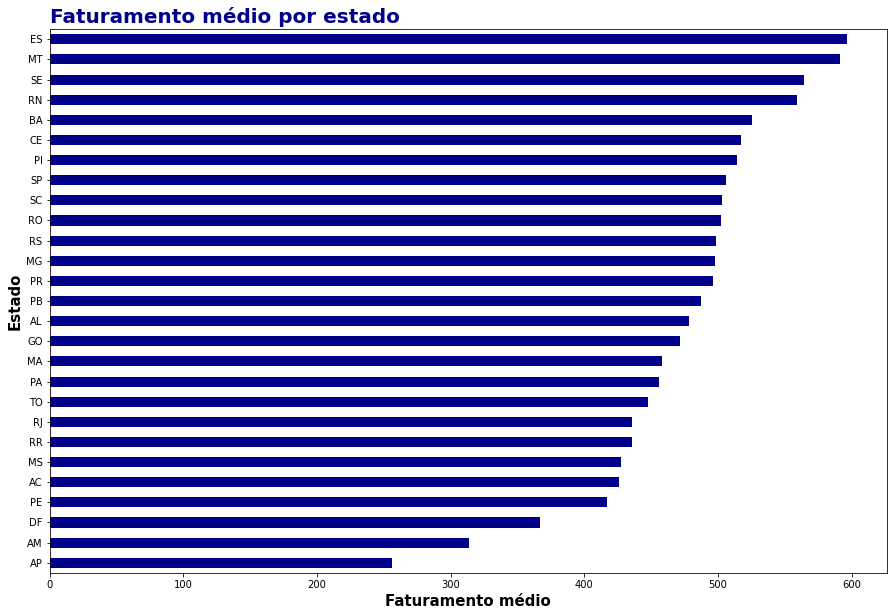

In [62]:
a4.plot(kind='barh',figsize=(15,10),color='darkblue')
plt.xlabel('Faturamento médio',          
           fontdict={'color' : 'black', 'weight': 'bold', 'size': 15})

plt.ylabel('Estado',          
           fontdict={'color' : 'black', 'weight': 'bold', 'size': 15})

plt.title('Faturamento médio por estado', 
          fontdict={'color' : 'darkblue', 'weight': 'bold', 'size': 20}, loc='left')

plt.legend().remove()

O Espírito Santo é o estado com maior faturamento médio (R$596.18), enquanto o Amapá continua a possuir o menor (R$256.00).